#**Customer Churn Prediction Model using Decision Trees**

#####- **Bujji Saikam**

###**Project Overview**

- The goal of this project is to build a decision tree model to predict customer churn using streaming service data. Customer churn refers to customers who stop using a company's service. Predicting churn can help companies take preventive measures to retain customers.

###**Steps Involved**
1. Introduction to Decision Trees
2. Understanding Measures of Impurity
3. Data Collection and Loading
4. Data Inspection and Cleaning
5. Exploratory Data Analysis (EDA)
6. Data Preprocessing
7. Model Building (Using Decision Tree)
8. Model Evaluation
9. Handling Imbalanced Data
10. Feature Importance Analysis
11. Conclusion and Insights

###**1. Introduction to Decision Trees**


**Explanation**:

Decision Trees are a popular supervised learning algorithm used for classification and regression tasks. They work by splitting the data into subsets based on the most significant features, which results in a tree-like structure. Decision Trees are easy to interpret and implement, making them a good choice for predictive modeling.

###**2. Understanding Measures of Impurity**


**Explanation:**
- **Gini Impurity**: Measures how often a randomly chosen element from the set would be incorrectly labeled. Lower values indicate better splits.
- **Entropy**: Measures the disorder or uncertainty in the data. Similar to Gini impurity but derived from information theory.
- **Information Gain**: Represents the reduction in entropy or impurity after a dataset split.
- **Variance Reduction**: Used for regression trees to measure the reduction in variance after a split.

###**3. Understanding the Working of Decision Tree Algorithm**

- **Splitting**: Dividing a dataset into subsets based on a feature that maximizes the reduction in impurity.
- **Pruning**: Reducing the size of the decision tree by removing branches that have little importance, preventing overfitting.
-**Tree Depth**: Refers to the longest path from the root to a leaf, controlling model complexity.

###**3. Data Collection and Loading**


**Explanation:**

Load the streaming service customer data into a DataFrame. This data typically contains customer information and a label indicating whether the customer has churned or not.

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
data = pd.read_csv('/content/sample_data/Telco-Customer-Churn.csv', encoding = 'unicode_escape')

In [3]:
# calling few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###**4. Data Inspection and Cleaning**

**Explanation:**

Inspect the data for missing values, data types, and inconsistencies. Clean the data by handling missing values, converting data types, and encoding categorical variables.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# basic statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
# Handle missing values
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###**5. Exploratory Data Analysis (EDA)**


**Explanation:**

When predicting whether a customer will leave (churn) from a service, some pieces of information (features) about the customer are more important than others. From your dataset, here's what you need to know:

1. **Key Features to Focus On:**
- **Tenure:** How long a customer has been with the company. Customers who haven't been with the company for long might be more likely to leave.

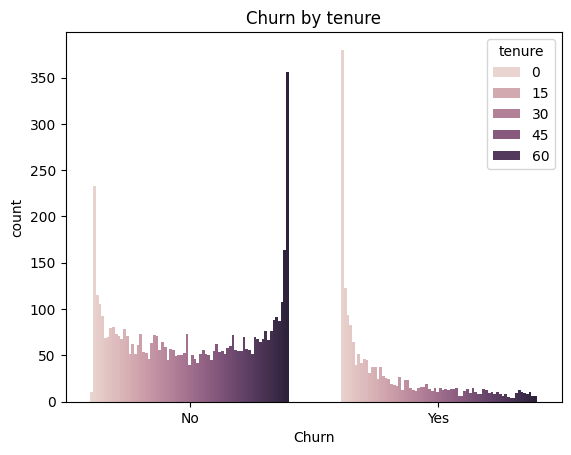

In [7]:
# Visualize churn by tenure
sns.countplot(data = data, x = 'Churn', hue = 'tenure')
plt.title('Churn by tenure')
plt.show()

   - **Contract Type:** Whether a customer has a month-to-month contract, or a longer contract (like one year or two years). Customers on month-to-month contracts might be more likely to leave.

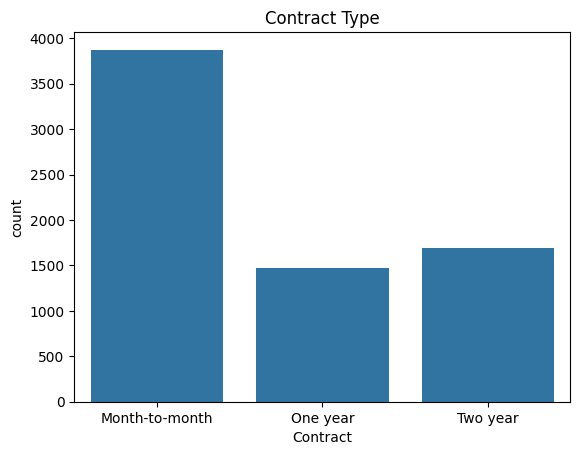

In [8]:
# Visualize contract type
sns.countplot(data = data, x = 'Contract')
plt.title('Contract Type')
plt.show()

   - **Payment Method:** The method the customer uses to pay, such as credit card, bank transfer, or electronic check. Some payment methods might be linked to higher churn rates.

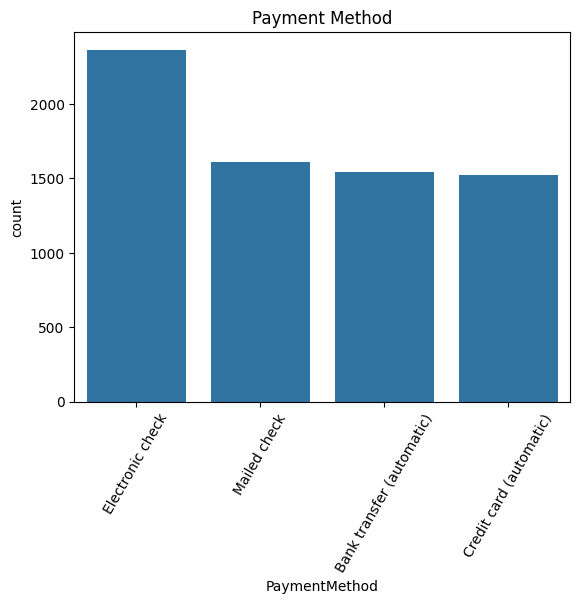

In [9]:
# Visualize Payment Method
sns.countplot(data = data, x = 'PaymentMethod')
plt.xticks(rotation = 60)
plt.title('Payment Method')
plt.show()

   - **Monthly Charges:** How much the customer is charged every month. Higher monthly charges might make some customers more likely to leave.

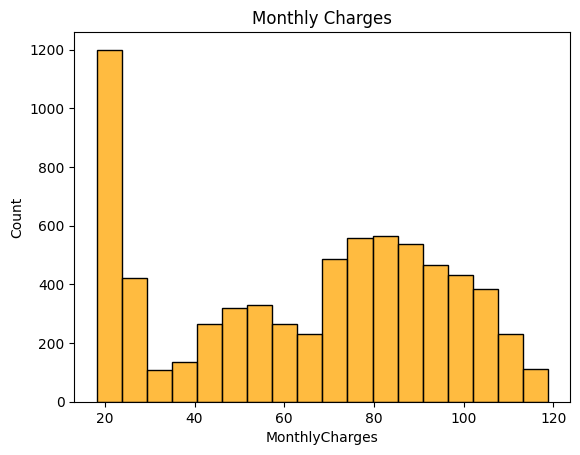

In [10]:
# Visualize Monthly Charges
sns.histplot(data = data, x = 'MonthlyCharges', color = 'orange')
plt.title('Monthly Charges')
plt.show()

   - **Total Charges:** The total amount the customer has been billed. This gives an idea of how much the customer has spent overall.

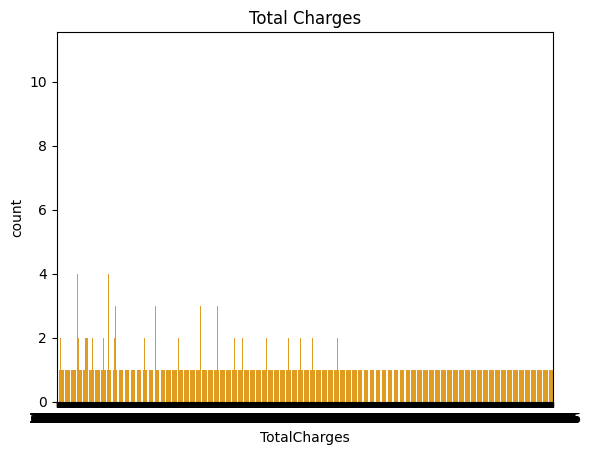

In [11]:
# Visualize Total Charges
sns.countplot(data = data, x = 'TotalCharges', color = 'orange')
plt.title('Total Charges')
plt.show()

   - **Paperless Billing:** Whether the customer receives bills electronically or by paper. This might influence their likelihood of staying or leaving.

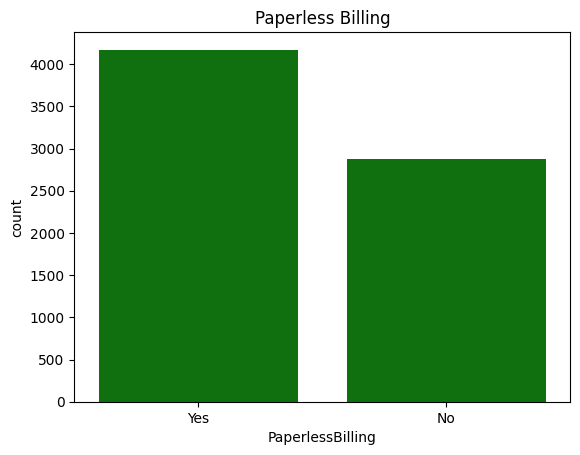

In [12]:
# Visualize Paperless Billing
sns.countplot(data = data, x = 'PaperlessBilling', color = 'green')
plt.title('Paperless Billing')
plt.show()

   - **Internet Service Type:** The kind of internet service the customer uses (e.g., DSL, fiber optic, or none). The type of service might affect their satisfaction and decision to leave.

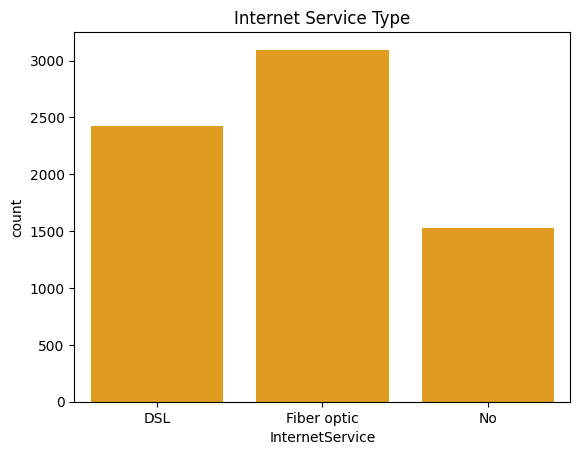

In [13]:
# Visualize Internet Service Type
sns.countplot(data = data, x = 'InternetService', color = 'orange')
plt.title('Internet Service Type')
plt.show()

- **Additional Services:** Features like Online Security, Online Backup, Device Protection, Tech Support, Streaming TV, and Streaming Movies. Having these services might mean the customer is more engaged and less likely to leave.

- **Senior Citizen:** Whether the customer is a senior citizen. Different age groups might have different churn patterns.

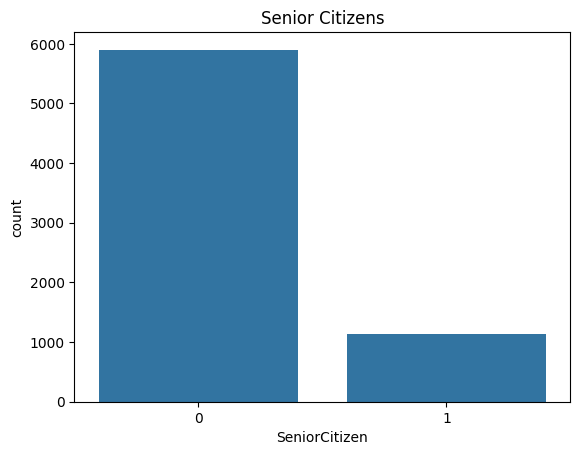

In [14]:
# Visualize Senior Citizens
sns.countplot(data = data, x = 'SeniorCitizen')
plt.title('Senior Citizens')
plt.show()

2. **The Target Feature:**
- **Churn:** This is the most important feature because it shows if a customer has left the service or not. This is what you are trying to predict.

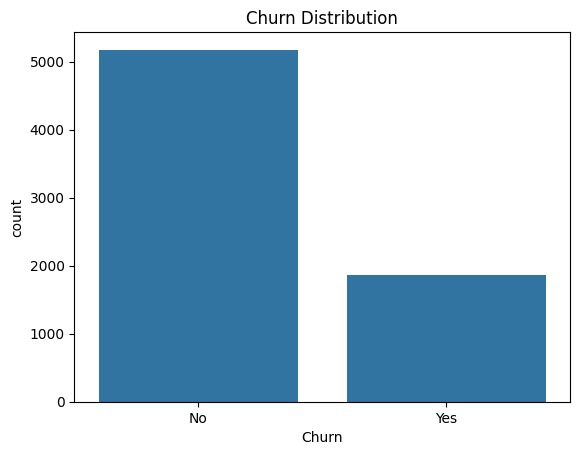

In [15]:
# Visualize churn distribution
sns.countplot(data = data, x = 'Churn')
plt.title('Churn Distribution')
plt.show()

3. **Less Important Features:**
- **Gender**, **Partner**, and **Dependents** might not be as influential in predicting churn compared to the features listed above.

###**6. Data Preprocessing**

**Explanation:**

Prepare the data for modeling by scaling and splitting into training and test sets. Features are separated from the target variable (churn status).

In [16]:
# Encode categorical variables
data = pd.get_dummies(data, drop_first=True)

In [17]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9,Churn_Yes
0,0,1,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,0,45,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [18]:
# Separate features and target variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

In [19]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

###**7. Model Building (Using Decision Tree)**

**Explanation:**

Build a Decision Tree model using the DecisionTreeClassifier from sklearn. Fit the model on the training data.

In [21]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

In [22]:
# Fit the model on training data
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

###**8. Model Evaluation**

**Explanation:**

Evaluate the performance of the model using metrics such as accuracy, confusion matrix, precision, recall, and F1 score.

In [23]:
# Predict on test data
y_pred = clf.predict(X_test)

In [24]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7960246095598675


In [25]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[1335  204]
 [ 227  347]]


In [26]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.87      0.86      1539
        True       0.63      0.60      0.62       574

    accuracy                           0.80      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.80      0.79      2113



###**9. Handling Imbalanced Data**

**Explanation:**

Customer churn data can often be imbalanced, with more customers not churning than churning. Use the SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.

In [27]:
# Apply SMOTE to the training data
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [28]:
# Refit the model on the balanced data
clf_smote = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
clf_smote.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [29]:
# Evaluate the model on test data
y_pred_smote = clf_smote.predict(X_test)

In [30]:
print("Accuracy after SMOTE:", accuracy_score(y_test, y_pred_smote))

Accuracy after SMOTE: 0.7799337434926644


In [31]:
print("Confusion Matrix after SMOTE:\n", confusion_matrix(y_test, y_pred_smote))

Confusion Matrix after SMOTE:
 [[1378  161]
 [ 304  270]]


In [32]:
print("Classification Report after SMOTE:\n", classification_report(y_test, y_pred_smote))

Classification Report after SMOTE:
               precision    recall  f1-score   support

       False       0.82      0.90      0.86      1539
        True       0.63      0.47      0.54       574

    accuracy                           0.78      2113
   macro avg       0.72      0.68      0.70      2113
weighted avg       0.77      0.78      0.77      2113



###**13. Feature Importance Analysis**

**Explanation:**

Identify which features are most important for predicting customer churn by analyzing the feature importance scores generated by the model.

In [33]:
# Get feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

In [34]:
# Print the feature ranking
print("Feature ranking:")
for i in range(X.shape[1]):
    print(f"{i + 1}. Feature {X.columns[indices[i]]} ({importances[indices[i]]})")

Streaming output truncated to the last 5000 lines.
8602. Feature TotalCharges_7806.5 (0.0)
8603. Feature TotalCharges_7845.8 (0.0)
8604. Feature TotalCharges_7843.55 (0.0)
8605. Feature TotalCharges_7842.3 (0.0)
8606. Feature TotalCharges_7840.6 (0.0)
8607. Feature TotalCharges_784.45 (0.0)
8608. Feature TotalCharges_784.25 (0.0)
8609. Feature TotalCharges_7839.85 (0.0)
8610. Feature TotalCharges_781.4 (0.0)
8611. Feature TotalCharges_781.25 (0.0)
8612. Feature TotalCharges_7806.6 (0.0)
8613. Feature TotalCharges_7966.9 (0.0)
8614. Feature TotalCharges_7968.85 (0.0)
8615. Feature TotalCharges_797.1 (0.0)
8616. Feature TotalCharges_8093.15 (0.0)
8617. Feature TotalCharges_813.45 (0.0)
8618. Feature TotalCharges_813.3 (0.0)
8619. Feature TotalCharges_8129.3 (0.0)
8620. Feature TotalCharges_8127.6 (0.0)
8621. Feature TotalCharges_8126.65 (0.0)
8622. Feature TotalCharges_8124.2 (0.0)
8623. Feature TotalCharges_812.5 (0.0)
8624. Feature TotalCharges_812.4 (0.0)
8625. Feature TotalCharges_81

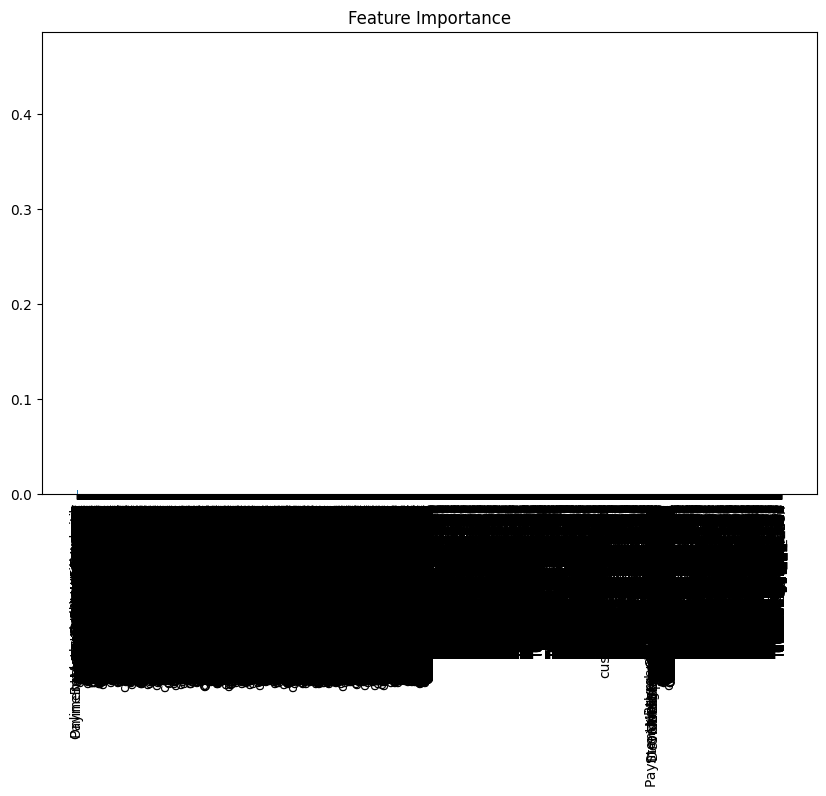

In [35]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.show()

###**11. Conclusion and Insights**


**Explanation:**

Based on the evaluation metrics and feature importance analysis, conclude which features most influence churn prediction and discuss how well the model performed. If necessary, suggest improvements, such as using more complex models, feature engineering, or hyperparameter tuning.

**- Thank Q**